<a href="https://colab.research.google.com/github/SirishaTeja/Analysis-and-Visualization/blob/main/Data_Visualization_with_Power_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
superstore = pd.read_csv("/content/Superstore_Dataset.csv", encoding='ISO-8859-1')


In [23]:
superstore.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [24]:
superstore.duplicated().sum()


0

In [25]:
superstore.drop("Postal Code", axis=1, inplace=True)


In [26]:
superstore.rename(columns={"Ship Mode":"Shipping Mode",
                            "Segment":"Customer Segment",
                            "Country":"Country",
                            "City":"City",
                            "State":"State",
                            "Region":"Region",
                            "Category":"Product Category",
                            "Sub-Category":"Product Sub-Category",
                            "Sales":"Sales",
                            "Quantity":"Quantity",
                            "Discount":"Discount",
                            "Profit":"Profit"},
                            inplace=True)


In [27]:
import os
directory = "/Users/Your_Username/Desktop/data"
if not os.path.exists(directory):
    os.makedirs(directory)


In [28]:
superstore.to_csv("/Users/Your_Username/Desktop/data/cleaned_superstore.csv", index=False)


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
import os
print(os.getcwd())


/content


In [36]:
print(superstore.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Shipping Mode',
       'Customer ID', 'Customer Name', 'Customer Segment', 'Country', 'City',
       'State', 'Region', 'Product ID', 'Product Category',
       'Product Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [37]:
# Calculate total sales by category
sales_by_category = superstore.groupby('Product Category')['Sales'].sum().reset_index()


In [38]:
# Calculate total sales by region
sales_by_region = superstore.groupby('Region')['Sales'].sum().reset_index()

In [40]:
# Calculate total profit by category
profit_by_category = superstore.groupby('Product Category')['Profit'].sum().reset_index()


In [41]:
# Calculate total profit by region
profit_by_region = superstore.groupby('Region')['Profit'].sum().reset_index()

In [43]:
# Calculate total orders by category
orders_by_category = superstore.groupby('Product Category')['Order ID'].count().reset_index()

In [44]:
# Calculate total orders by region
orders_by_region = superstore.groupby('Region')['Order ID'].count().reset_index()


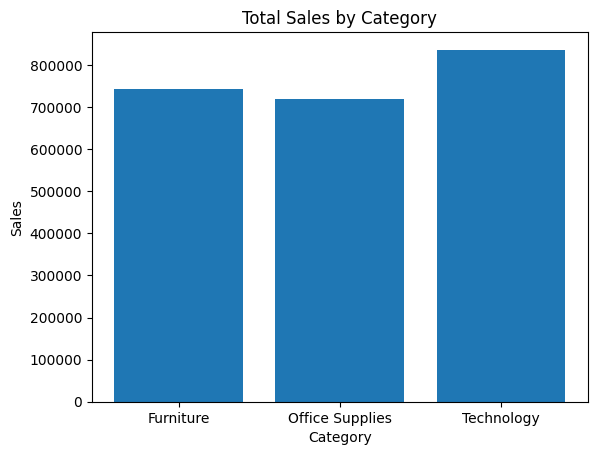

In [47]:
# Bar chart of total sales by category
plt.bar(sales_by_category['Product Category'], sales_by_category['Sales'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


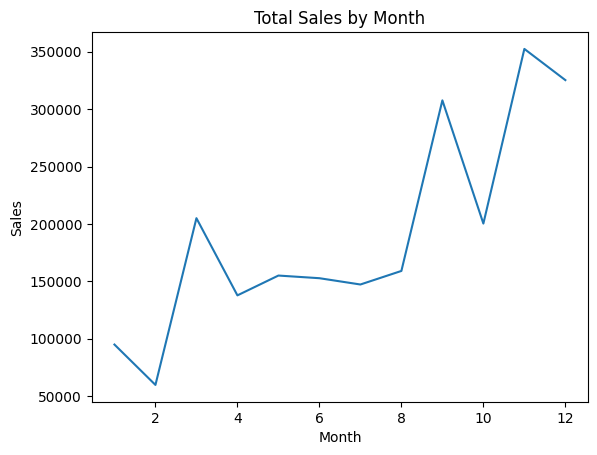

In [48]:
# Line chart of total sales by month
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
sales_by_month = superstore.groupby(superstore['Order Date'].dt.month)['Sales'].sum().reset_index()
plt.plot(sales_by_month['Order Date'], sales_by_month['Sales'])
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

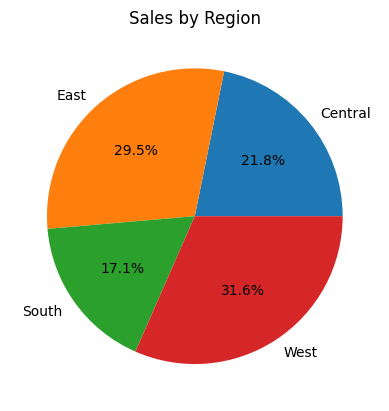

In [49]:
# Pie chart of sales by region
plt.pie(sales_by_region['Sales'], labels=sales_by_region['Region'], autopct='%1.1f%%')
plt.title('Sales by Region')
plt.show()


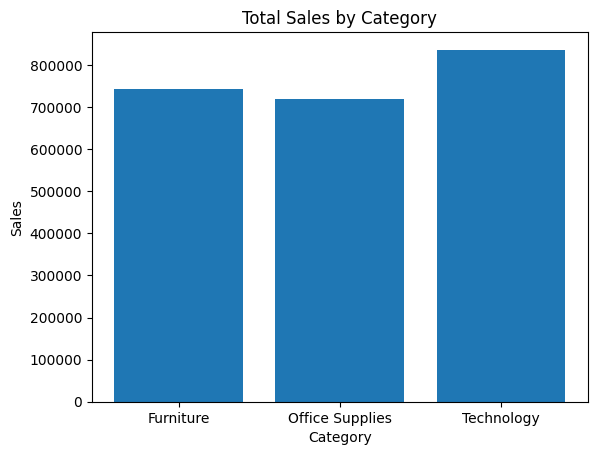

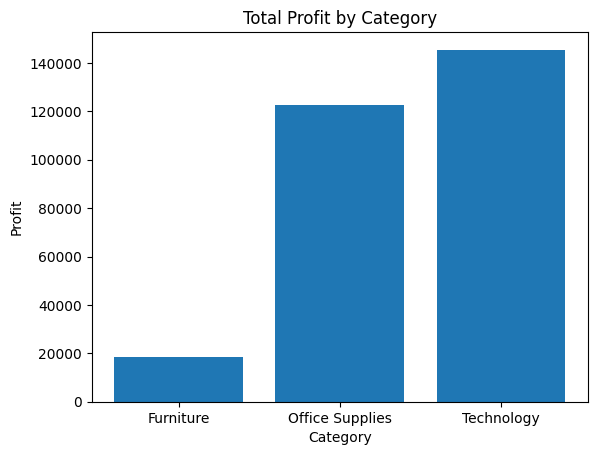

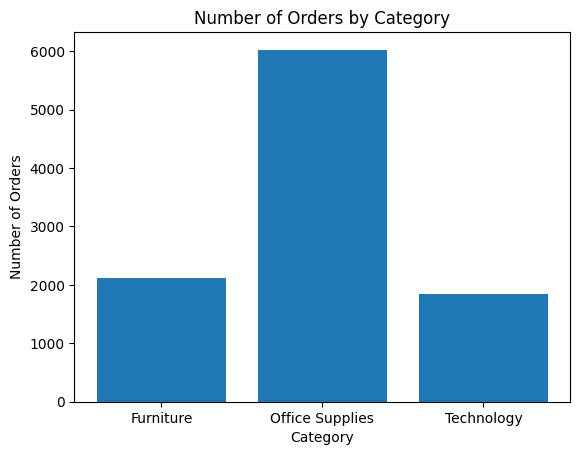

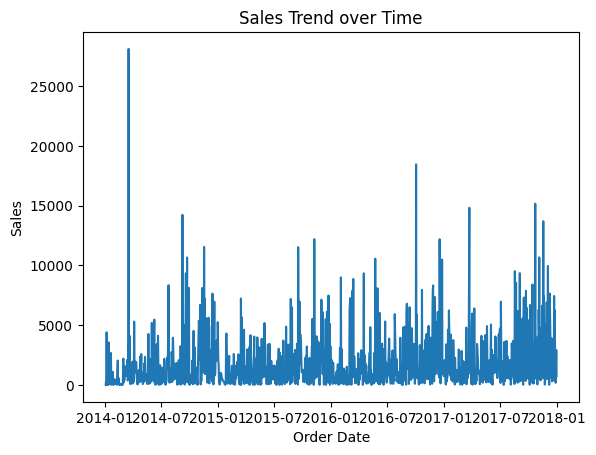

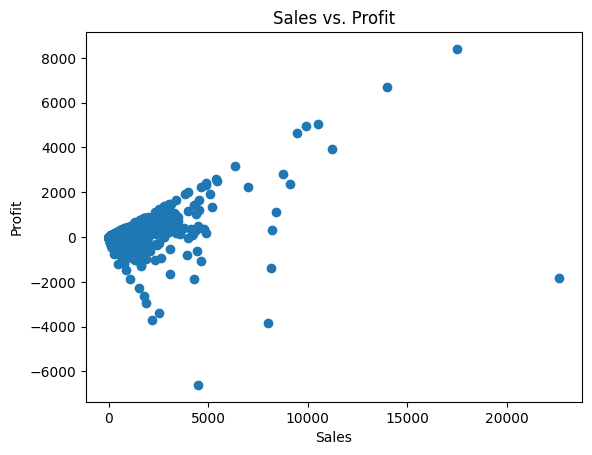

In [50]:
import matplotlib.pyplot as plt

# Total sales by category
sales_by_category = superstore.groupby('Product Category')['Sales'].sum().reset_index()
plt.bar(sales_by_category['Product Category'], sales_by_category['Sales'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# Total profit by category
profit_by_category = superstore.groupby('Product Category')['Profit'].sum().reset_index()
plt.bar(profit_by_category['Product Category'], profit_by_category['Profit'])
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

# Number of orders by category
orders_by_category = superstore.groupby('Product Category')['Order ID'].count().reset_index()
plt.bar(orders_by_category['Product Category'], orders_by_category['Order ID'])
plt.title('Number of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.show()

# Sales trend over time
sales_over_time = superstore.groupby('Order Date')['Sales'].sum().reset_index()
plt.plot(sales_over_time['Order Date'], sales_over_time['Sales'])
plt.title('Sales Trend over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

# Sales vs. profit scatter plot
plt.scatter(superstore['Sales'], superstore['Profit'])
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()
